**Assignment - 1 (Time Series)**\
**Manan Ghai**\
**101903311**\
**4CO12**

**Importing the necessary libraries**

In [175]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

**Section to supress code warnings**

In [176]:
import warnings
warnings.filterwarnings("ignore")

**Main Code using the ARIMA model**

In [195]:
hold = []
predictions = list()

for i in range(1,101):
  def parser(x):
	  return datetime.strptime('2022-'+x, '%Y-%m')
  series = read_csv('Dataset.csv',header=0, index_col=1, parse_dates=True, squeeze=True, date_parser=parser)
  series = series.iloc[(i-1)*10:(i*10)]
  series.index = series.index.to_period('M')

  col = ['Para-9','Para-10','Para-11','Para-12','Para-13']
  for i in col:
    X = series[i]
    size = 9
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]


    for t in range(len(test)):
	    model = ARIMA(history, order=(2,1,0))
	    model_fit = model.fit()
	    output = model_fit.forecast()
	    yhat = output[0]
	    predictions.append(yhat)
	    obs = test[t]
	    history.append(obs)
	    #print('predicted=%f, expected=%f' % (yhat, obs))


**Section to gather the Test data**

In [194]:
test_full=[]
for i in range(1,101):
  def parser(x):
	  return datetime.strptime('2022-'+x, '%Y-%m')
  series = read_csv('Dataset.csv',header=0, index_col=1, parse_dates=True, squeeze=True, date_parser=parser)
  series = series.iloc[(i-1)*10:(i*10)]
  series.index = series.index.to_period('M')
  for j in col:
    x=series[j]
    test_full.append(x[9])

**Root Mean Square Error**

In [196]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_full, predictions))
print('RMSE of the Model: %.3f' % rmse)

RMSE of the Model: 37.438


**Graph Plots For Parameters 9-13 for all road sections**

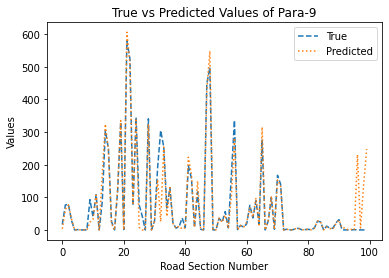

In [197]:
#Plot For Para-9
para9_test = test_full[::5]
para9_predict = predictions[::5]

pyplot.plot(para9_test,linestyle = 'dashed', label = 'True')
pyplot.plot(para9_predict,linestyle = 'dotted', label = 'Predicted')
pyplot.xlabel('Road Section Number')
pyplot.ylabel('Values')
pyplot.title('True vs Predicted Values of Para-9')
pyplot.legend(loc = 'upper right')
pyplot.show()

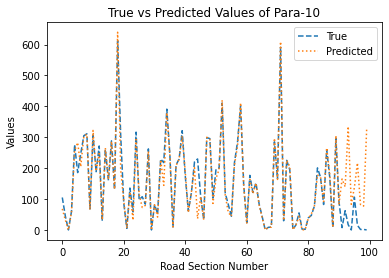

In [198]:
#Plot For Para-10
para10_test = test_full[1::5]
para10_predict = predictions[1::5]

pyplot.plot(para10_test,linestyle = 'dashed', label = 'True')
pyplot.plot(para10_predict,linestyle = 'dotted', label = 'Predicted')
pyplot.xlabel('Road Section Number')
pyplot.ylabel('Values')
pyplot.title('True vs Predicted Values of Para-10')
pyplot.legend(loc = 'upper right')
pyplot.show()

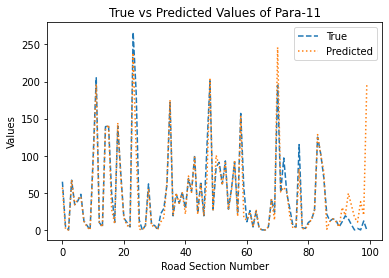

In [199]:
#Plot For Para-11
para11_test = test_full[2::5]
para11_predict = predictions[2::5]

pyplot.plot(para11_test,linestyle = 'dashed', label = 'True')
pyplot.plot(para11_predict,linestyle = 'dotted', label = 'Predicted')
pyplot.xlabel('Road Section Number')
pyplot.ylabel('Values')
pyplot.title('True vs Predicted Values of Para-11')
pyplot.legend(loc = 'upper right')
pyplot.show()

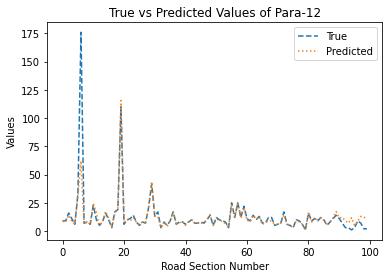

In [200]:
#Plot For Para-12
para12_test = test_full[3::5]
para12_predict = predictions[3::5]

pyplot.plot(para12_test,linestyle = 'dashed', label = 'True')
pyplot.plot(para12_predict,linestyle = 'dotted', label = 'Predicted')
pyplot.xlabel('Road Section Number')
pyplot.ylabel('Values')
pyplot.title('True vs Predicted Values of Para-12')
pyplot.legend(loc = 'upper right')
pyplot.show()

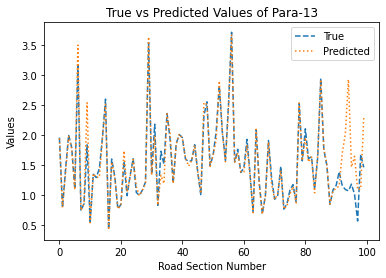

In [201]:
#Plot For Para-13
para13_test = test_full[4::5]
para13_predict = predictions[4::5]

pyplot.plot(para13_test,linestyle = 'dashed', label = 'True')
pyplot.plot(para13_predict,linestyle = 'dotted', label = 'Predicted')
pyplot.xlabel('Road Section Number')
pyplot.ylabel('Values')
pyplot.title('True vs Predicted Values of Para-13')
pyplot.legend(loc = 'upper right')
pyplot.show()